In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Set working directory
os.chdir("/Users/nivedharakigmail.com/Desktop/Edwisor/Project 2")
#Load data
bike_rental_data = pd.read_csv("BikeRentalDataset.csv")

# Exploratory Data Analysis

In [3]:
#Observing sample data
bike_rental_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,40544,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,40545,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,40546,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,40547,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,40548,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Observing summary of data
bike_rental_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,40909.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,40544.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,40726.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,40909.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,41091.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,41274.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#Dropping non-significant/redundant columns
#instant and dteday are just like index and does not contribute to the prediction
bike_rental_data = bike_rental_data.drop(["instant","dteday",],axis = 1)
bike_rental_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#Fetching the datatype of each column
bike_rental_data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#Fetching unique value count in each column
bike_rental_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
#Splitting the dataset into numerical and categorical variables
categorical_variable_list = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
numeric_variables_list = ["temp","atemp","hum","windspeed","casual","registered","cnt"]
#Converting the datatype of categorical values
for i in categorical_variable_list :
    bike_rental_data[i] = bike_rental_data[i].astype("category")   

In [9]:
#Verifying the datatype of each column
bike_rental_data.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

# Missing Value Analysis

In [10]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(bike_rental_data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
#missing_val.to_csv("Absenteeism_dataset_missingvalues.csv", index = False)
missing_val

#There are no missing values so imputation is not required

,Variables,Missing_percentage
0,season,0
1,yr,0
2,mnth,0
3,holiday,0
4,weekday,0
5,workingday,0
6,weathersit,0
7,temp,0
8,atemp,0
9,hum,0


## Distribution analysis

### Using histogram for numerical variables

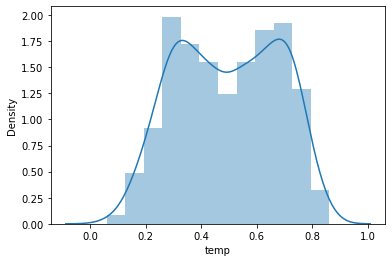

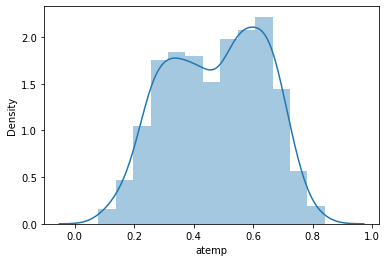

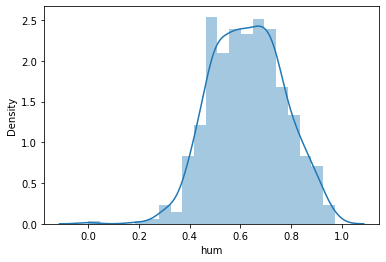

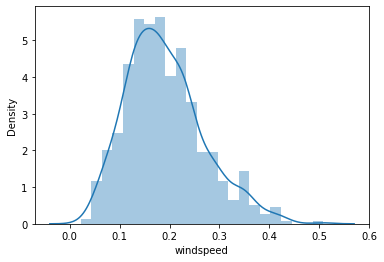

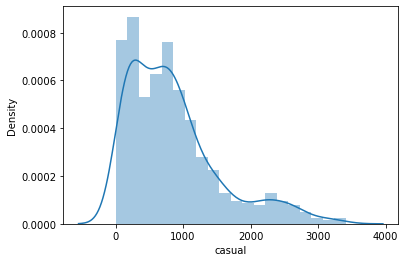

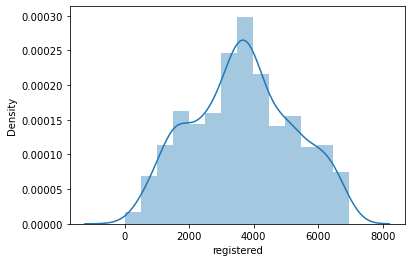

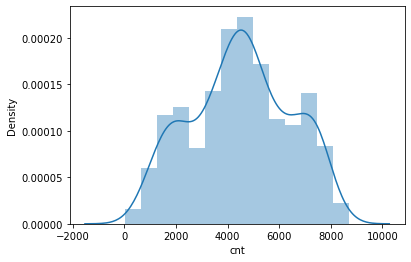

In [11]:
# histogram continuous variables vs cnt
for col in numeric_variables_list:
    sns.distplot(bike_rental_data[col])
    plt.show()
#Distribution is skewed towards left in casual

### Using scatterplot for numerical variables

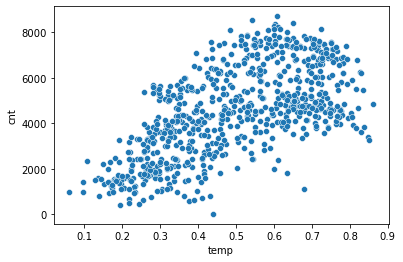

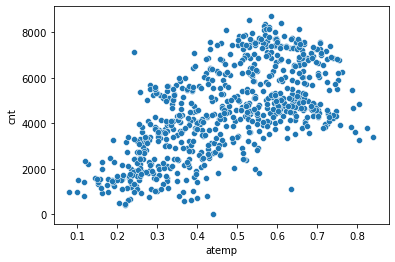

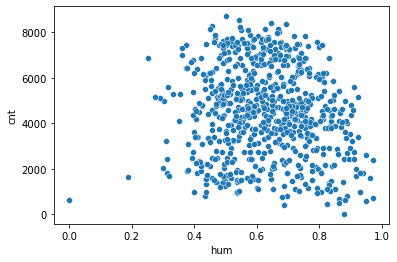

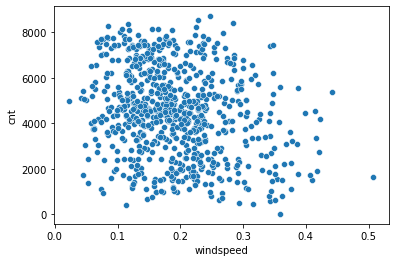

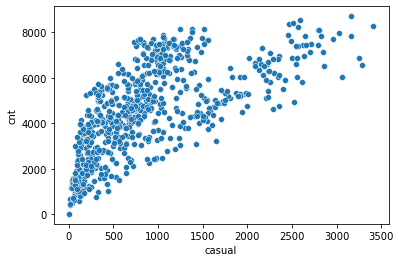

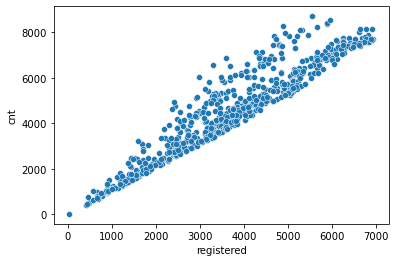

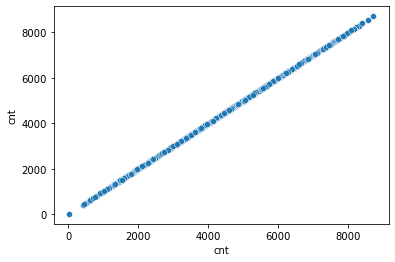

In [12]:
# scatter plots of continuous variables vs cnt
for col in numeric_variables_list:
    sns.scatterplot(x = col, y = 'cnt' , data = bike_rental_data)
    plt.show()

### Using barplot(heatmap) for categorical variables

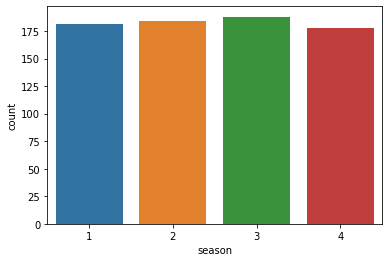

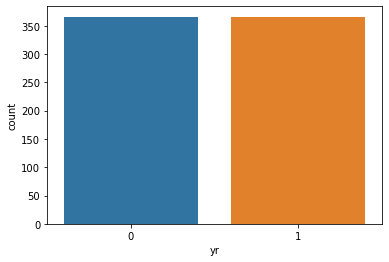

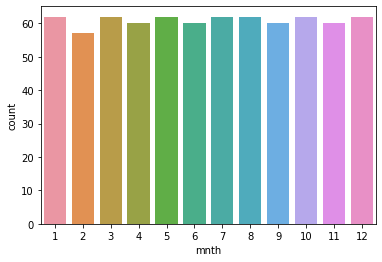

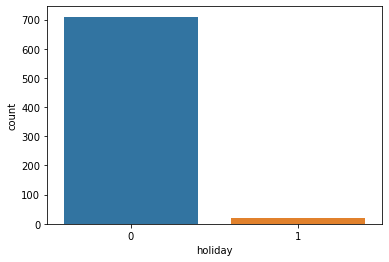

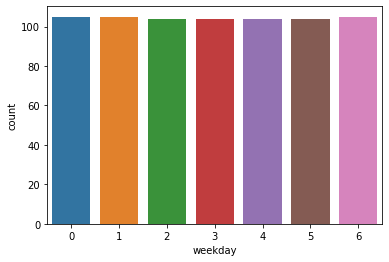

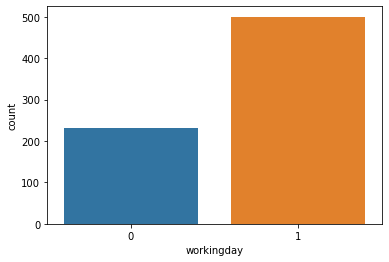

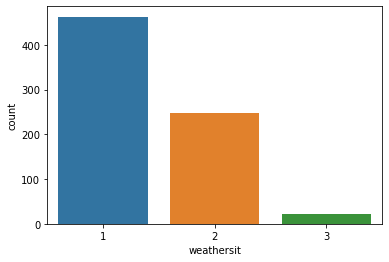

In [13]:
# histogram continuous variables vs cnt
for col in categorical_variable_list:
    sns.countplot(bike_rental_data[col])
    plt.show()

## Outlier Analysis

In [14]:
#Storing all column names
variables_list = ["season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]


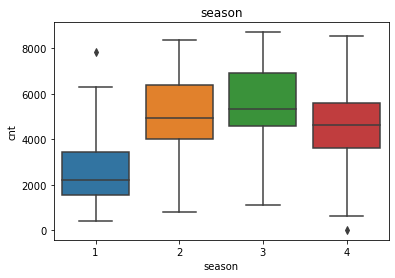

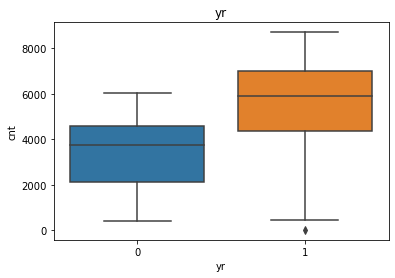

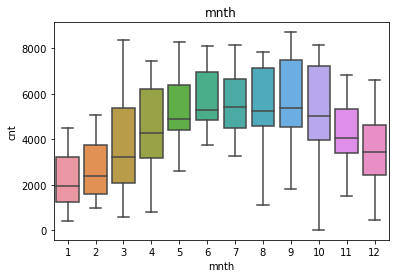

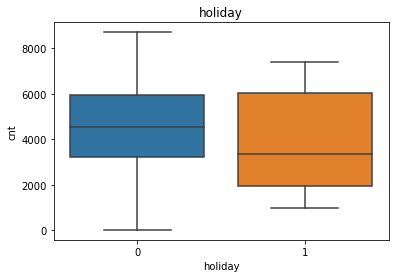

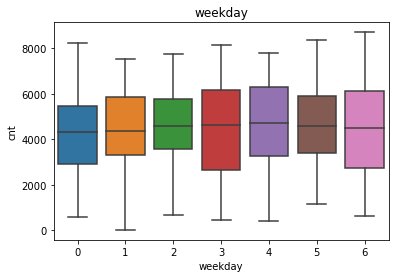

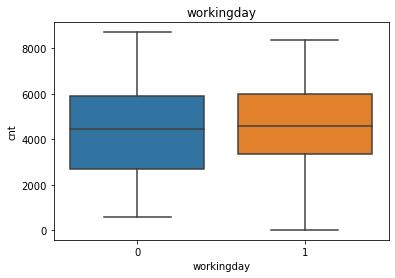

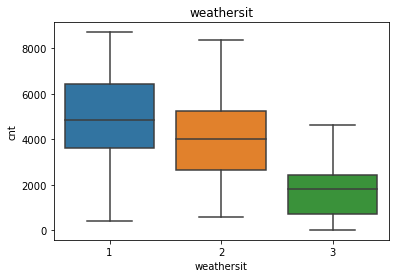

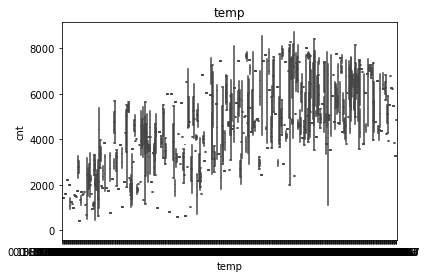

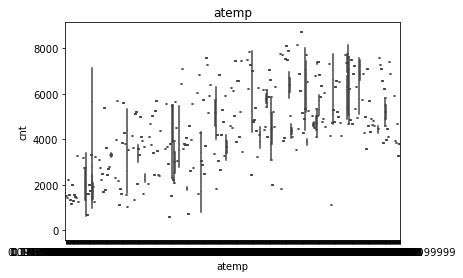

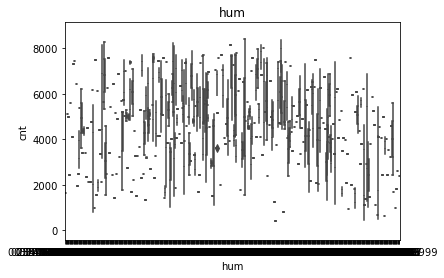

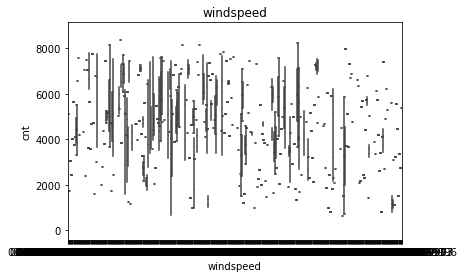

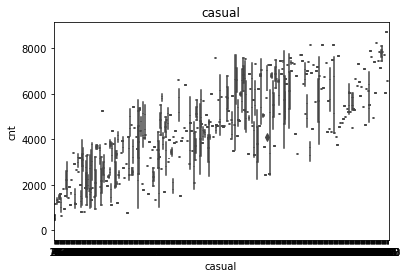

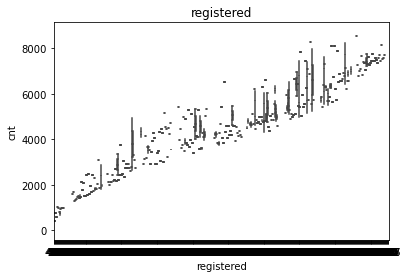

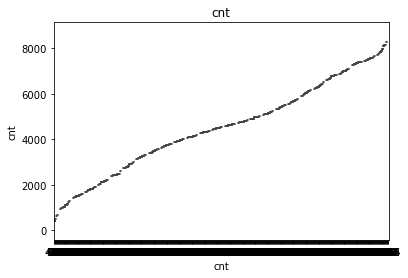

In [15]:
#plotting boxplot for all the predictors with outliers
for var in variables_list:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(bike_rental_data[var],bike_rental_data['cnt'])
    plt.title(var)
    plt.show()

In [16]:
for i in numeric_variables_list:
    #print(i)
    q75, q25 = np.percentile(bike_rental_data.loc[:,i], [75,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #print(minimum)
    #print(maximum)
    
    print('{var} : {X} Outliers'.format(var = i, X = (bike_rental_data.loc[bike_rental_data.loc[:,i] < minimum,i].count() + bike_rental_data.loc[bike_rental_data.loc[:,i] > maximum,i].count())))  
    #Imputing outliers with minimum and maximum values
    bike_rental_data.loc[bike_rental_data[i] < minimum,i] = np.nan
    bike_rental_data.loc[bike_rental_data[i] > maximum,i] = np.nan
    
    #outliers found in hum,windspeed and casual

temp : 0 Outliers
atemp : 0 Outliers
hum : 2 Outliers
windspeed : 13 Outliers
casual : 44 Outliers
registered : 0 Outliers
cnt : 0 Outliers


In [17]:
pd.DataFrame(bike_rental_data.isnull().sum())

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,2


In [18]:
bike_rental_data.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual         float64
registered     float64
cnt            float64
dtype: object

### Imputing values

In [19]:
#Imputing with missing values using KNN
bike_rental_data = pd.DataFrame(KNNImputer(n_neighbors=2).fit_transform(bike_rental_data), columns = bike_rental_data.columns, index=bike_rental_data.index)


In [20]:
#Checking number of missing values
bike_rental_data.isnull().sum().sum()

0

In [21]:
#Replacing cnt with sum of registered values and imputed casual values
bike_rental_data['cnt'] = bike_rental_data['casual'] + bike_rental_data['registered']

## Feature Selection

### Using Correlation matrix and VIF technique for numerical data

<AxesSubplot:>

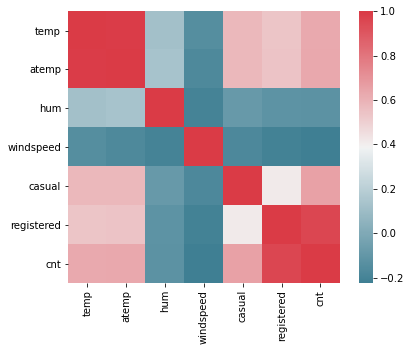

In [22]:
##Correlation analysis
#Correlation plot
corr_matrix = bike_rental_data.loc[:,numeric_variables_list]

#Setting the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = corr_matrix.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#Correlation is high between temp and atemp pair and registered and cnt pair.Hence one predictor from each can be dropped

In [23]:
#correlation matrix
bike_rental_data[numeric_variables_list].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.122413,-0.144417,0.583479,0.540012,0.631315
atemp,0.991702,1.000000,0.136029,-0.169814,0.583432,0.544192,0.634749
hum,0.122413,0.136029,1.000000,-0.204279,-0.085479,-0.114885,-0.122006
windspeed,-0.144417,-0.169814,-0.204279,1.000000,-0.172089,-0.205270,-0.224155
casual,0.583479,0.583432,-0.085479,-0.172089,1.000000,0.414638,0.660443
registered,0.540012,0.544192,-0.114885,-0.205270,0.414638,1.000000,0.957132
cnt,0.631315,0.634749,-0.122006,-0.224155,0.660443,0.957132,1.000000


In [24]:
#VIF
VIF_df = bike_rental_data[numeric_variables_list].assign(const = 1)
pd.Series([variance_inflation_factor(VIF_df.values,i) for i in range(VIF_df.shape[1])],index=VIF_df.columns)
#The VIF of the predictors casual,registered and cnt are infinite, which infers multicollinearity.Hence registered can be dropped.

temp          63.198839
atemp         64.075124
hum            1.181766
windspeed      1.157818
casual              inf
registered          inf
cnt                 inf
const         53.654915
dtype: float64

### Using ANOVA technique for categorical data

In [25]:
for i in categorical_variable_list:
    print(i) 
    print(stats.f_oneway(bike_rental_data[i],bike_rental_data['cnt']))
#p-values infer that all the categorical variables are significant

season
F_onewayResult(statistic=4079.7738458127556, pvalue=0.0)
yr
F_onewayResult(statistic=4083.4214936511526, pvalue=0.0)
mnth
F_onewayResult(statistic=4072.416096578552, pvalue=0.0)
holiday
F_onewayResult(statistic=4084.284255412353, pvalue=0.0)
weekday
F_onewayResult(statistic=4078.8561686054854, pvalue=0.0)
workingday
F_onewayResult(statistic=4083.086553929901, pvalue=0.0)
weathersit
F_onewayResult(statistic=4081.7866758578043, pvalue=0.0)


In [26]:
bike_rental_data = bike_rental_data.drop(["atemp","registered",],axis = 1)
bike_rental_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.805833,0.160446,331.0,985.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.696087,0.248539,131.0,801.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.437273,0.248309,120.0,1349.0
3,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,0.590435,0.160296,108.0,1562.0
4,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,0.436957,0.186900,82.0,1600.0


In [27]:
#Verifying presence of multicollinearity after dropping columns
numeric_variables_list = ["temp","hum","windspeed","casual","cnt"]
#VIF
VIF_df = bike_rental_data[numeric_variables_list].assign(const = 1)
pd.Series([variance_inflation_factor(VIF_df.values,i) for i in range(VIF_df.shape[1])],index=VIF_df.columns)
#The VIF of the predictors casual,registered and cnt are infinite, which infers multicollinearity.Hence registered can be dropped.

temp          1.967248
hum           1.170144
windspeed     1.124880
casual        1.952653
cnt           2.282921
const        50.233634
dtype: float64

## Feature Engineering

In [28]:
# Creating dummy variables
bike_rental_data = pd.get_dummies(bike_rental_data, columns = categorical_variable_list) 
bike_rental_data.shape

(731, 37)

## Sampling

In [29]:
#Splitting data into train and test set
X = bike_rental_data.drop(['cnt'], axis = "columns")
y = bike_rental_data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Model Building

In [30]:
#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

In [31]:
#Define function to calculate MAPE
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape

### Multiple linear regression

In [32]:
# Root Mean Squared Error: 583.0262083926224
# R^2 Score(coefficient of determination) = 0.9145644120817447
# Mean Absolute Percentage Error: 0.14730439907877285
# Mean Squared Error: 339919.5596726775
# Accuracy = 99.85%

In [33]:
#Training
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, y_train)

LinearRegression()

In [34]:
#Predicting test values
y_pred_mlr = regressor_mlr.predict(X_test)

In [35]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, y_pred_mlr)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, y_pred_mlr)))
print("Mean Absolute Percentage Error: "+str(MAPE(y_test, y_pred_mlr)))
print("Mean Squared Error: "+str(mean_squared_error(y_test, y_pred_mlr)))

Root Mean Squared Error: 583.0262083926224
R^2 Score(coefficient of determination) = 0.9145644120817447
Mean Absolute Percentage Error: 0.14730439907877285
Mean Squared Error: 339919.5596726775


In [36]:
accuracy = 100 - MAPE(y_test, y_pred_mlr)
print('Accuracy = {:0.2f}%.'.format(accuracy))

Accuracy = 99.85%.


#### HyperParameter Tuning using GridSearchCV

In [37]:
#Commenting code as GridSearch gives the same result for MLR

In [38]:
# kf = KFold(n_splits= 3 , random_state=30)
# par_grid ={}
# mlr_tune=GridSearchCV(LinearRegression(),
#                      param_grid=par_grid ,
#                      cv=kf ,
#                      scoring = 'neg_mean_absolute_error',
#                      verbose= 6000)

# mlr_tune.fit(X_train,y_train)

In [39]:
# mlr_tune.best_estimator_

In [40]:
# mlr_tuned_predictions=mlr_tune.predict(X_test)

In [41]:
# #Calculate RMSE and R-squared value for MLR
# print("Root Mean Squared Error: "+str(RMSE(y_test, mlr_tuned_predictions)))
# print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, mlr_tuned_predictions)))
# print("Mean Absolute Percentage Error: "+str(MAPE(y_test, mlr_tuned_predictions)))
# print("Mean Squared Error: "+str(mean_squared_error(y_test, mlr_tuned_predictions)))

In [42]:
# accuracy = 100 - MAPE(y_testa, mlr_tuned_predictions)
# print('Accuracy = {:0.2f}%.'.format(accuracy))

### Decision tree

In [43]:
# Root Mean Squared Error: 837.69156829119
# R^2 Score(coefficient of determination) = 0.8236274698728033
# Mean Absolute Percentage Error: 0.24867766696962293
# Mean Squared Error: 701727.1635861534
#Accuracy = 99.75%

In [44]:
## Training
regressor_dt = DecisionTreeRegressor(max_depth=4,random_state = 30)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=30)

In [45]:
#Predicting test value
y_pred_dt = regressor_dt.predict(X_test)

In [46]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, y_pred_dt)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, y_pred_dt)))
print("Mean Absolute Percentage Error: "+str(MAPE(y_test, y_pred_dt)))
print("Mean Squared Error: "+str(mean_squared_error(y_test, y_pred_dt)))

Root Mean Squared Error: 837.69156829119
R^2 Score(coefficient of determination) = 0.8236274698728033
Mean Absolute Percentage Error: 0.24867766696962293
Mean Squared Error: 701727.1635861534


In [47]:
accuracy = 100 - MAPE(y_test, y_pred_dt)
print('Accuracy = {:0.2f}%.'.format(accuracy))

Accuracy = 99.75%.


#### HyperParameter Tuning using GridSearchCV

In [48]:
# Root Mean Squared Error: 984.6925160684603
# R^2 Score(coefficient of determination) = 0.7562952852534734
# Mean Absolute Percentage Error: 0.26903309693769245
# Mean Squared Error: 969619.3512012351
# Accuracy = 99.73%

In [49]:
kf = KFold(n_splits= 3 , random_state=30)
par_grid={'min_samples_leaf': list(range(1,20,2)),'max_features': list(range(1,5))}
dt_tune=GridSearchCV(DecisionTreeRegressor(max_depth=4,random_state = 30),
                     param_grid=par_grid ,
                     cv=kf ,
                     scoring = 'neg_mean_absolute_error',
                     verbose= 6000)

dt_tune.fit(X_train,y_train)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=1, min_samples_leaf=1 ..............................
[CV]  max_features=1, min_samples_leaf=1, score=-1020.231, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] max_features=1, min_samples_leaf=1 ..............................
[CV]  max_features=1, min_samples_leaf=1, score=-1025.769, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] max_features=1, min_samples_leaf=1 ..............................
[CV]  max_features=1, min_samples_leaf=1, score=-934.580, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] max_features=1, min_samples_leaf=3 ..............................
[CV]  max_features=1, min_samples_leaf=3, score=-1021.264, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 

[CV]  max_features=2, min_samples_leaf=7, score=-873.988, total=   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.1s remaining:    0.0s
[CV] max_features=2, min_samples_leaf=9 ..............................
[CV]  max_features=2, min_samples_leaf=9, score=-912.297, total=   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.1s remaining:    0.0s
[CV] max_features=2, min_samples_leaf=9 ..............................
[CV]  max_features=2, min_samples_leaf=9, score=-1169.151, total=   0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.1s remaining:    0.0s
[CV] max_features=2, min_samples_leaf=9 ..............................
[CV]  max_features=2, min_samples_leaf=9, score=-873.988, total=   0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s remaining:    0.0s
[CV] max_features=2, min_samples_leaf=11 .............................
[CV]  max_features=2, min_samples_leaf=11, score=-916.839, total=   0.0s
[Parallel(n_jobs=1)]: Done  46 out

[CV]  max_features=4, min_samples_leaf=11, score=-892.800, total=   0.0s
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.3s remaining:    0.0s
[CV] max_features=4, min_samples_leaf=13 .............................
[CV]  max_features=4, min_samples_leaf=13, score=-1111.414, total=   0.0s
[Parallel(n_jobs=1)]: Done 109 out of 109 | elapsed:    0.3s remaining:    0.0s
[CV] max_features=4, min_samples_leaf=13 .............................
[CV]  max_features=4, min_samples_leaf=13, score=-920.171, total=   0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.3s remaining:    0.0s
[CV] max_features=4, min_samples_leaf=13 .............................
[CV]  max_features=4, min_samples_leaf=13, score=-1101.783, total=   0.0s
[Parallel(n_jobs=1)]: Done 111 out of 111 | elapsed:    0.4s remaining:    0.0s
[CV] max_features=4, min_samples_leaf=15 .............................
[CV]  max_features=4, min_samples_leaf=15, score=-1112.228, total=   0.0s
[Parallel(n_jobs=1)]: Done 1

GridSearchCV(cv=KFold(n_splits=3, random_state=30, shuffle=False),
             estimator=DecisionTreeRegressor(max_depth=4, random_state=30),
             param_grid={'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              19]},
             scoring='neg_mean_absolute_error', verbose=6000)

In [50]:
dt_tune.best_estimator_

DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_leaf=3,
                      random_state=30)

In [51]:
dt_tuned_predictions=dt_tune.predict(X_test)

In [52]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_tuned_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_tuned_predictions)))
print("Mean Absolute Percentage Error: "+str(MAPE(y_test, dt_tuned_predictions)))
print("Mean Squared Error: "+str(mean_squared_error(y_test, dt_tuned_predictions)))

Root Mean Squared Error: 984.6925160684603
R^2 Score(coefficient of determination) = 0.7562952852534734
Mean Absolute Percentage Error: 0.26903309693769245
Mean Squared Error: 969619.3512012351


In [53]:
accuracy = 100 - MAPE(y_test, dt_tuned_predictions)
print('Accuracy = {:0.2f}%.'.format(accuracy))

Accuracy = 99.73%.


### Random Forest

In [54]:
# Root Mean Squared Error: 562.0580174063001
# R^2 Score(coefficient of determination) = 0.9205991866652553
# Mean Absolute Percentage Error: 0.15017016335357303
# Mean Squared Error: 315909.2149307007
# Accuracy = 99.85%

In [55]:
#Training
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 30)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=30)

In [56]:
#Predicting test value
y_pred_rf = regressor_rf.predict(X_test)

In [57]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, y_pred_rf)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, y_pred_rf)))
print("Mean Absolute Percentage Error: "+str(MAPE(y_test, y_pred_rf)))
print("Mean Squared Error: "+str(mean_squared_error(y_test, y_pred_rf)))

Root Mean Squared Error: 562.0580174063001
R^2 Score(coefficient of determination) = 0.9205991866652553
Mean Absolute Percentage Error: 0.15017016335357303
Mean Squared Error: 315909.2149307007


In [58]:
accuracy = 100 - MAPE(y_test, y_pred_rf)
print('Accuracy = {:0.2f}%.'.format(accuracy))

Accuracy = 99.85%.


#### HyperParameter Tuning using GridSearchCV

In [59]:
# Root Mean Squared Error: 984.5491554463206
# R^2 Score(coefficient of determination) = 0.7563662416498733
# Mean Absolute Percentage Error: 0.32364374564835496
# Mean Squared Error: 969337.0394900632
# Accuracy = 99.68%

In [60]:
#for random forest regression.
kf = KFold(n_splits= 3 , random_state=30)
par_grid={'n_estimators':[100,500],'max_features':list(range(1,5)),'max_depth': [2,4]}

rf_tune=GridSearchCV(RandomForestRegressor(random_state=30),
                     param_grid=par_grid ,
                     cv=kf ,
                     scoring = 'neg_mean_absolute_error',
                     verbose= 6000)

rf_tune.fit(X_train,y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=2, max_features=1, n_estimators=100 ...................
[CV]  max_depth=2, max_features=1, n_estimators=100, score=-1337.957, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] max_depth=2, max_features=1, n_estimators=100 ...................
[CV]  max_depth=2, max_features=1, n_estimators=100, score=-1353.657, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] max_depth=2, max_features=1, n_estimators=100 ...................
[CV]  max_depth=2, max_features=1, n_estimators=100, score=-1286.609, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[CV] max_depth=2, max_features=1, n_estimators=500 ...................
[CV]  max_depth=2, max_features=1, n_estimators=500, score=-1348.723, total=   0.3

[CV]  max_depth=4, max_features=2, n_estimators=500, score=-974.919, total=   0.3s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    6.9s remaining:    0.0s
[CV] max_depth=4, max_features=2, n_estimators=500 ...................
[CV]  max_depth=4, max_features=2, n_estimators=500, score=-898.979, total=   0.3s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    7.2s remaining:    0.0s
[CV] max_depth=4, max_features=3, n_estimators=100 ...................
[CV]  max_depth=4, max_features=3, n_estimators=100, score=-886.803, total=   0.1s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    7.3s remaining:    0.0s
[CV] max_depth=4, max_features=3, n_estimators=100 ...................
[CV]  max_depth=4, max_features=3, n_estimators=100, score=-886.225, total=   0.1s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    7.3s remaining:    0.0s
[CV] max_depth=4, max_features=3, n_estimators=100 ...................
[CV]  max_depth=4, max_features=3, n_estimators=100, score=-814.

GridSearchCV(cv=KFold(n_splits=3, random_state=30, shuffle=False),
             estimator=RandomForestRegressor(random_state=30),
             param_grid={'max_depth': [2, 4], 'max_features': [1, 2, 3, 4],
                         'n_estimators': [100, 500]},
             scoring='neg_mean_absolute_error', verbose=6000)

In [61]:
rf_tune.best_estimator_

RandomForestRegressor(max_depth=4, max_features=4, n_estimators=500,
                      random_state=30)

In [62]:
rf_tuned_predictions=rf_tune.predict(X_test)

In [63]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_tuned_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_tuned_predictions)))
print("Mean Absolute Percentage Error: "+str(MAPE(y_test, rf_tuned_predictions)))
print("Mean Squared Error: "+str(mean_squared_error(y_test, rf_tuned_predictions)))


Root Mean Squared Error: 984.5491554463206
R^2 Score(coefficient of determination) = 0.7563662416498733
Mean Absolute Percentage Error: 0.32364374564835496
Mean Squared Error: 969337.0394900632


In [64]:
accuracy = 100 - MAPE(y_test, rf_tuned_predictions)
print('Accuracy = {:0.2f}%.'.format(accuracy))

Accuracy = 99.68%.


## K-fold cross validation

In [65]:
#0.7727504124586861
MLR_Score = cross_val_score(LinearRegression(), X,y,cv = 3)
np.average(MLR_Score)

0.7727504124586861

In [66]:
#-0.25498637997576934
DT_Score = cross_val_score(DecisionTreeRegressor(max_depth=2), X,y, cv = 3)
np.average(DT_Score)

-0.25498637997576934

In [67]:
#0.5851966086024508
RF_Score = cross_val_score(RandomForestRegressor(n_estimators = 10, random_state = 0), X,y, cv = 3)
np.average(RF_Score)

0.5851966086024508